In [9]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


👉 Upload 1 content image followed by 1 or more style images


Saving content.jpg to content (2).jpg
Saving style1.jpg.jfif to style1.jpg (2).jfif
Saving style2.jpg.jfif to style2.jpg.jfif


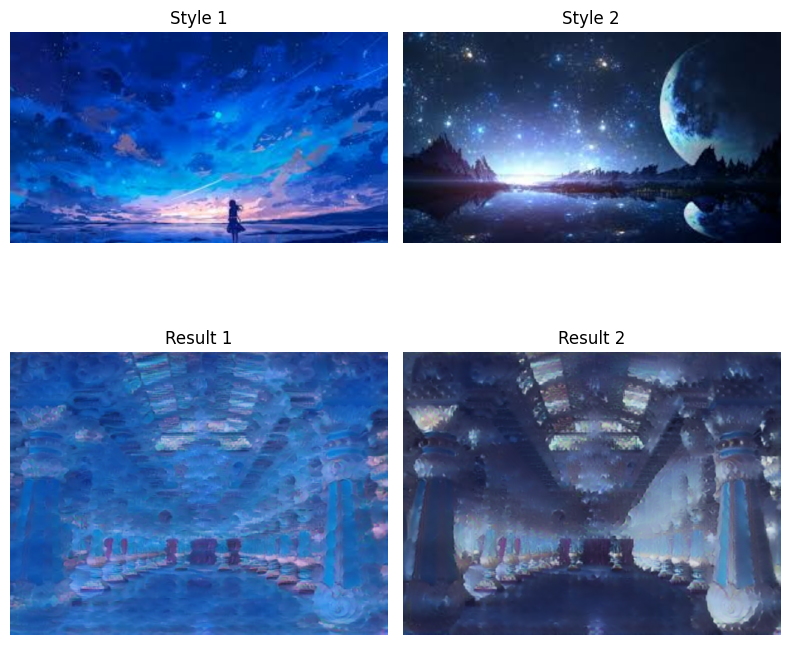

In [12]:
# STEP 1: Install necessary packages
!pip install tensorflow tensorflow_hub matplotlib

# STEP 2: Import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# STEP 3: Upload content and style images
print("👉 Upload 1 content image followed by 1 or more style images")
uploaded = files.upload()
file_names = list(uploaded.keys())

# STEP 4: Load images
def load_image(path, max_dim=512):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    return img[tf.newaxis, :]

# Separate content and style images
content_path = file_names[0]
style_paths = file_names[1:]  # 1 or more styles

content_image = load_image(content_path)
style_images = [load_image(p) for p in style_paths]

# STEP 5: Load NST model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# STEP 6: Apply style transfer for each style image
stylized_outputs = []
for i, style in enumerate(style_images):
    stylized = hub_model(tf.constant(content_image), tf.constant(style))[0]
    stylized_outputs.append((style, stylized))

# STEP 7: Display results
def show_image(tensor, title):
    image = tf.squeeze(tensor, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

n = len(stylized_outputs)
plt.figure(figsize=(4*n, 8))

# Top row: Style images
for i, (style, _) in enumerate(stylized_outputs):
    plt.subplot(2, n, i+1)
    show_image(style, f'Style {i+1}')

# Bottom row: Stylized results
for i, (_, output) in enumerate(stylized_outputs):
    plt.subplot(2, n, n+i+1)
    show_image(output, f'Result {i+1}')

plt.tight_layout()
plt.show()
